In [53]:
!pip install "dask[complete]"

### Import Dataset

In [9]:
import pandas as pd
url="https://raw.githubusercontent.com/projjal1/datasets/master/wine-k-means.csv"
dataset=pd.read_csv(url)
dataset.head()

,Class,Alcohol,Malic Acid,Ash,Alkalinity of Ash,Magnesium,Total Phenols,Flavanoids,Non-flavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Extract Label and drop from dataset

In [16]:
label=dataset["Class "]
dataset.drop(["Class "],axis=1,inplace=True)

In [17]:
dataset.head()

,Alcohol,Malic Acid,Ash,Alkalinity of Ash,Magnesium,Total Phenols,Flavanoids,Non-flavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Converting to Numpy Arrays

In [18]:
#Convert to Numpy arrays
arr=dataset.values
type(arr)

numpy.ndarray

In [20]:
arr_labels=label.values

### Import BallTree Model from Sklearn

In [5]:
#Import model from Sklearn
from sklearn.neighbors import BallTree

In [22]:
#Creating model
tree=BallTree(arr)

In [45]:
#finding out distance
dist, ind = tree.query(arr[:5], k=3) 

In [46]:
print("Distance",dist)
print("Index",ind)

Distance [[ 0.         10.3928052  22.34074753]
 [ 0.          6.78638343  7.83291772]
 [ 0.         12.2969915  13.16761937]
 [ 0.         30.09196903 31.15941752]
 [ 0.         17.72868015 20.77652521]]
Index [[  0  54  45]
 [  1   8   9]
 [  2  52  26]
 [  3   5  10]
 [  4  68 168]]


In [34]:
import dask

In [50]:
#Using dask to parallelize query inference
records_num=len(arr)
#Dividing query list into chunks
chunks=50
#Convering our result
result=[]
for i in range(records_num//chunks):
    #Parallelizing API call using Dask
    func=dask.delayed(tree.query)(arr[chunks*i:chunks*(i+1)],k=3)
    result.append(func)
    
#Total result
total=dask.delayed()(result)

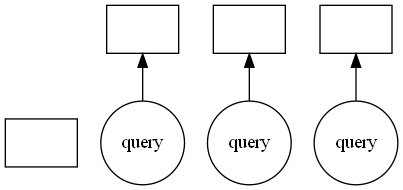

In [51]:
#Visualize result
total.visualize()

In [52]:
#Calling compute to generate result
total.compute()

[(array([[  0.        ,  10.3928052 ,  22.34074753],
         [  0.        ,   6.78638343,   7.83291772],
         [  0.        ,  12.2969915 ,  13.16761937],
         [  0.        ,  30.09196903,  31.15941752],
         [  0.        ,  17.72868015,  20.77652521],
         [  0.        ,  30.09196903,  60.48524365],
         [  0.        ,   6.23935093,  10.34467496],
         [  0.        ,  15.3305512 ,  16.63357147],
         [  0.        ,   3.27007645,   6.78638343],
         [  0.        ,   3.27007645,   7.83291772],
         [  0.        ,   5.41997232,  31.15941752],
         [  0.        ,   5.29867908,   9.81115691],
         [  0.        ,  25.17260018,  30.8559427 ],
         [  0.        ,   2.94961014,  32.46013709],
         [  0.        ,  33.05906986,  37.65407017],
         [  0.        ,  17.67303596,  25.17260018],
         [  0.        ,  13.47668728,  15.3305512 ],
         [  0.        ,  10.1335137 ,  30.42083661],
         [  0.        , 133.22215582, 165.0459